# Week 6 : Breast Cancer Dataset
---

**METADATA** <br>

id: Unique ID <br>
diagnosis: Malignant & Benign <br>
radius_mean: Radius of Lobes <br>
texture_mean: Mean of Surface Texture <br>
perimeter_mean: Outer Perimeter of Lobes <br>
area_mean: Mean Area of Lobes <br>
smoothness_mean: Mean of Smoothness Levels <br>
compactness_mean: Mean of Compactness <br>
concavity_mean: Mean of Concavity <br>
concave points_mean: Mean of Concave Points <br>
symmetry_mean: Mean of Symmetry <br>
fractal_dimension_mean: Mean of Fractal Dimension <br>
radius_se: SE of Radius <br>
texture_se: SE of Texture <br>
perimeter_se: Perimeter of SE <br>
area_se: Area of SE <br>
smoothness_se: SE of Smoothness <br>
compactness_se: SE of Compactness <br>
concavity_se: SE of Concavity <br>
concave points_se: SE of Concave Points <br>
symmetry_se: SE of Symmetry <br>
fractal_dimension_se: SE of Fractal Dimension <br>
radius_worst: Worst Radius <br>
texture_worst: Worst Texture <br>
perimeter_worst: Worst Perimeter <br>
area_worst: Worst Area <br>
smoothness_worst: Worst Smoothness <br>
compactness_worst: Worst Compactness <br>
concavity_worst: Worst Concavity <br>
concave points_worst: Worst Concave Points <br>
symmetry_worst: Worst Symmetry <br>
fractal_dimension_worst: Worst Fractal Dimension <br>

## Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [36]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/keziaelice/Dataset/refs/heads/main/breast-cancer.csv')
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
403,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.1172,0.19580,0.18100,0.08388,0.3297,0.07834
436,908916,B,12.87,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.02090,...,14.45,24.38,95.14,626.9,0.1214,0.16520,0.07127,0.06384,0.3313,0.07735
289,89143601,B,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.02173,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994
484,912600,B,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,...,17.01,14.20,112.50,854.3,0.1541,0.29790,0.40040,0.14520,0.2557,0.08181
446,9110732,M,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,...,21.53,38.54,145.40,1437.0,0.1401,0.37620,0.63990,0.19700,0.2972,0.09075
241,883539,B,12.42,15.04,78.61,476.5,0.07926,0.03393,0.01053,0.01108,...,13.20,20.37,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783
194,87556202,M,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,...,16.08,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
469,911366,B,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,...,13.36,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270
320,894604,B,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,...,11.28,20.61,71.53,390.4,0.1402,0.23600,0.18980,0.09744,0.2608,0.09702
453,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.14780,0.13730,0.10690,0.2606,0.07810


## Exploratory Data Analysis

2. Display the info column

In [37]:
#2
df.info()

# Dataset ini memiliki 569 baris, dengan 32 kolom.
# Seluruh kolom dalam dataset ini tidak memuat missing values (ditandai dengan 569 non-null pada setiap kolomnya).
# Seluruh kolom dalam dataset ini memiliki data type float64, kecuali id dengan data type int64 dan diagnosis dengan data type object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

3. Recheck missing value

In [38]:
#3
df.isnull().sum()

# Tidak ada missing value pada dataset ini

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


4. Show describe column

In [39]:
#4
df.describe()

# Menampilkan summary statistics seperti mean, standard deviation, quartile, serta nilai minimum dan maksimum untuk masing-masing kolom.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


5. Display the number of each unique value in diagnosis column (including NaN)

In [40]:
#5
diagnosis_count = df['diagnosis'].value_counts(dropna=False)
print(diagnosis_count)

# Ada dua unique value pada kolom diagnosis, yaitu B dan M, dimana masing-masing memiliki 357 data dan 212 data.

diagnosis
B    357
M    212
Name: count, dtype: int64


6. Visualization

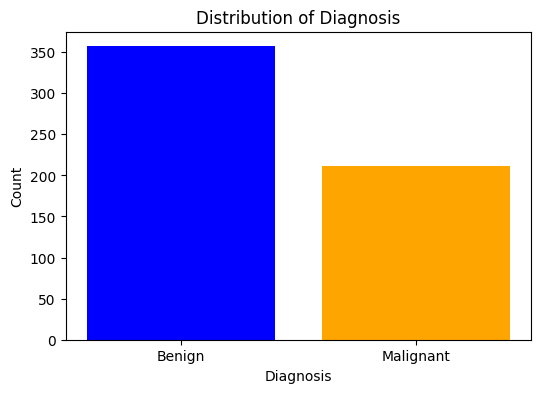

In [41]:
#6 Bar Chart
diagnosis_counts = df['diagnosis'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(diagnosis_counts.index, diagnosis_counts.values, color=['blue', 'orange'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

# Sekitar 350 orang dalam data didiagnosa memiliki benign cancer, sedangkan pasien lainnya yang berjumlah kurang lebih 200 orang memiliki malignant cancer.
# Hal ini menunjukkan data yang cukup seimbang, sehingga langkah tambahan seperti oversampling dan undersampling mungkin tidak terlalu diperlukan.

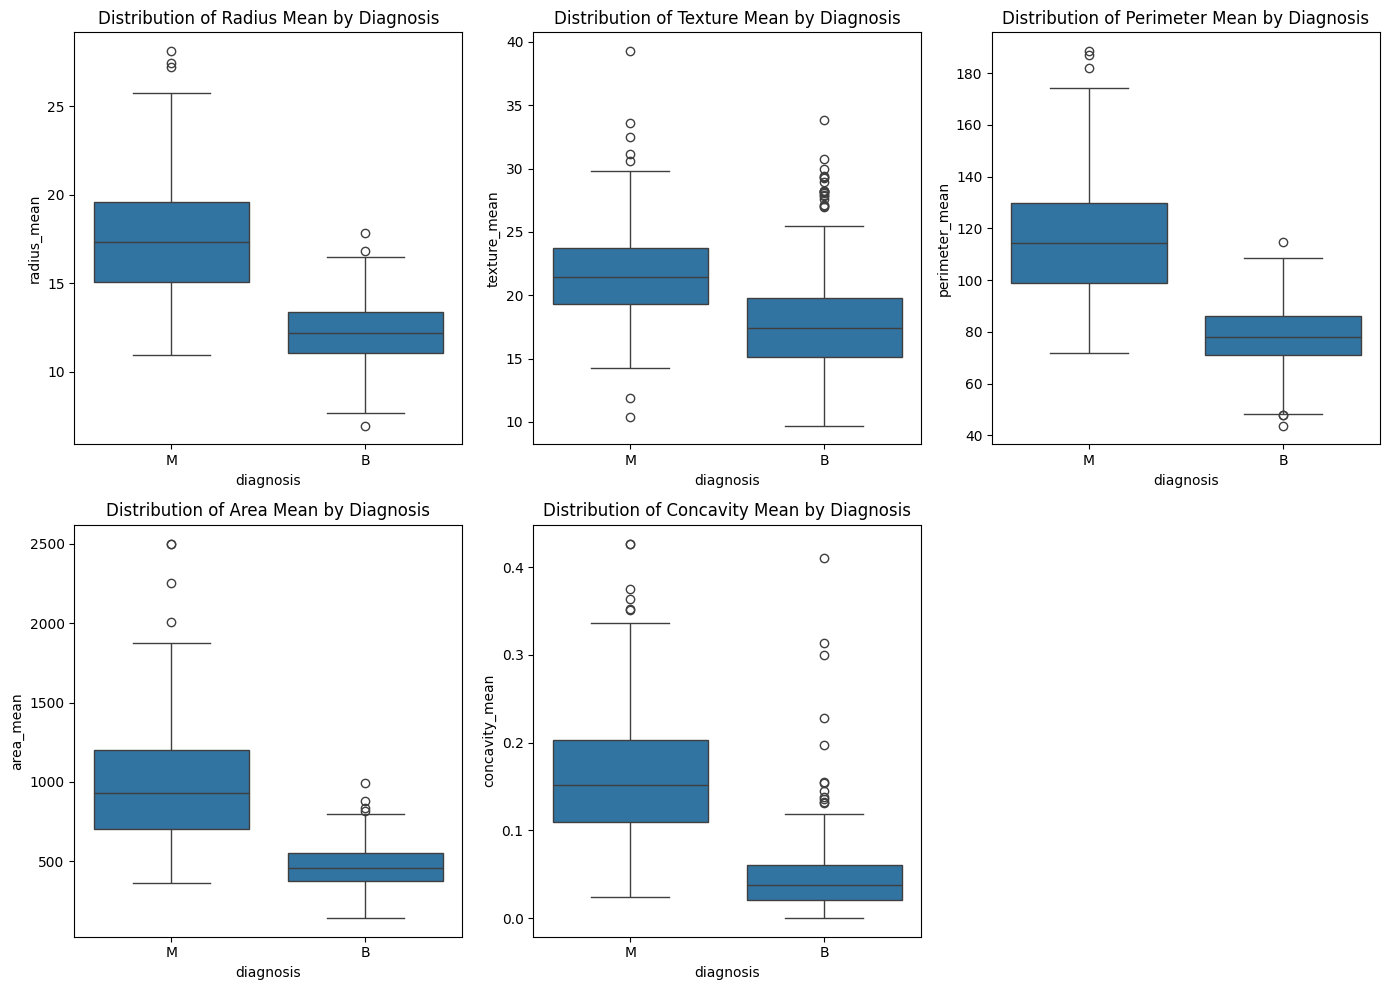

In [42]:
#6 Box Plot
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Distribution of {feature[0].upper()}{feature[1:-5]} Mean by Diagnosis')
plt.tight_layout()
plt.show()

# Distribution of Radius Mean by Diagnosis: Malignant memiliki nilai radius_mean yang secara signifikan lebih tinggi dibandingkan dengan Benign. Ini menunjukkan bahwa ukuran rata-rata tumor cenderung lebih besar pada kasus kanker ganas, yang dapat menjadi indikator penting dalam diagnosis dan penilaian risiko.
# Distribution of Texture Mean by Diagnosis: Distribusi texture_mean untuk Benign dan Malignant menunjukkan perbedaan yang jelas, di mana Malignant cenderung memiliki nilai texture_mean yang lebih tinggi. Hal ini dapat mengindikasikan bahwa tekstur yang lebih kasar atau tidak teratur mungkin terkait dengan sifat ganas dari tumor tersebut.
# Distribution of Perimeter Mean by Diagnosis: Perimeter Malignant lebih besar dibandingkan dengan Benign. Ini mengindikasikan bahwa Malignant yang lebih agresif cenderung memiliki keliling yang lebih besar, yang mungkin berhubungan dengan pertumbuhan dan penyebaran sel kanker.
# Distribution of Area Mean by Diagnosis: Malignant memiliki area yang lebih besar dibandingkan dengan Benign. Hal ini mendukung informasi sebelumnya bahwa Malignant cenderung lebih besar dalam ukuran dan volume, yang dapat menjadi faktor penting dalam penilaian klinis.
# Distribution of Concavity Mean by Diagnosis: Benign memiliki nilai yang lebih tinggi dibandingkan dengan Malignant. Ini mengindikasikan bahwa Benign cenderung memiliki permukaan yang lebih halus, sedangkan Malignant mungkin memiliki permukaan yang lebih tidak teratur atau kasar, yang bisa menjadi ciri khas tumor kanker.

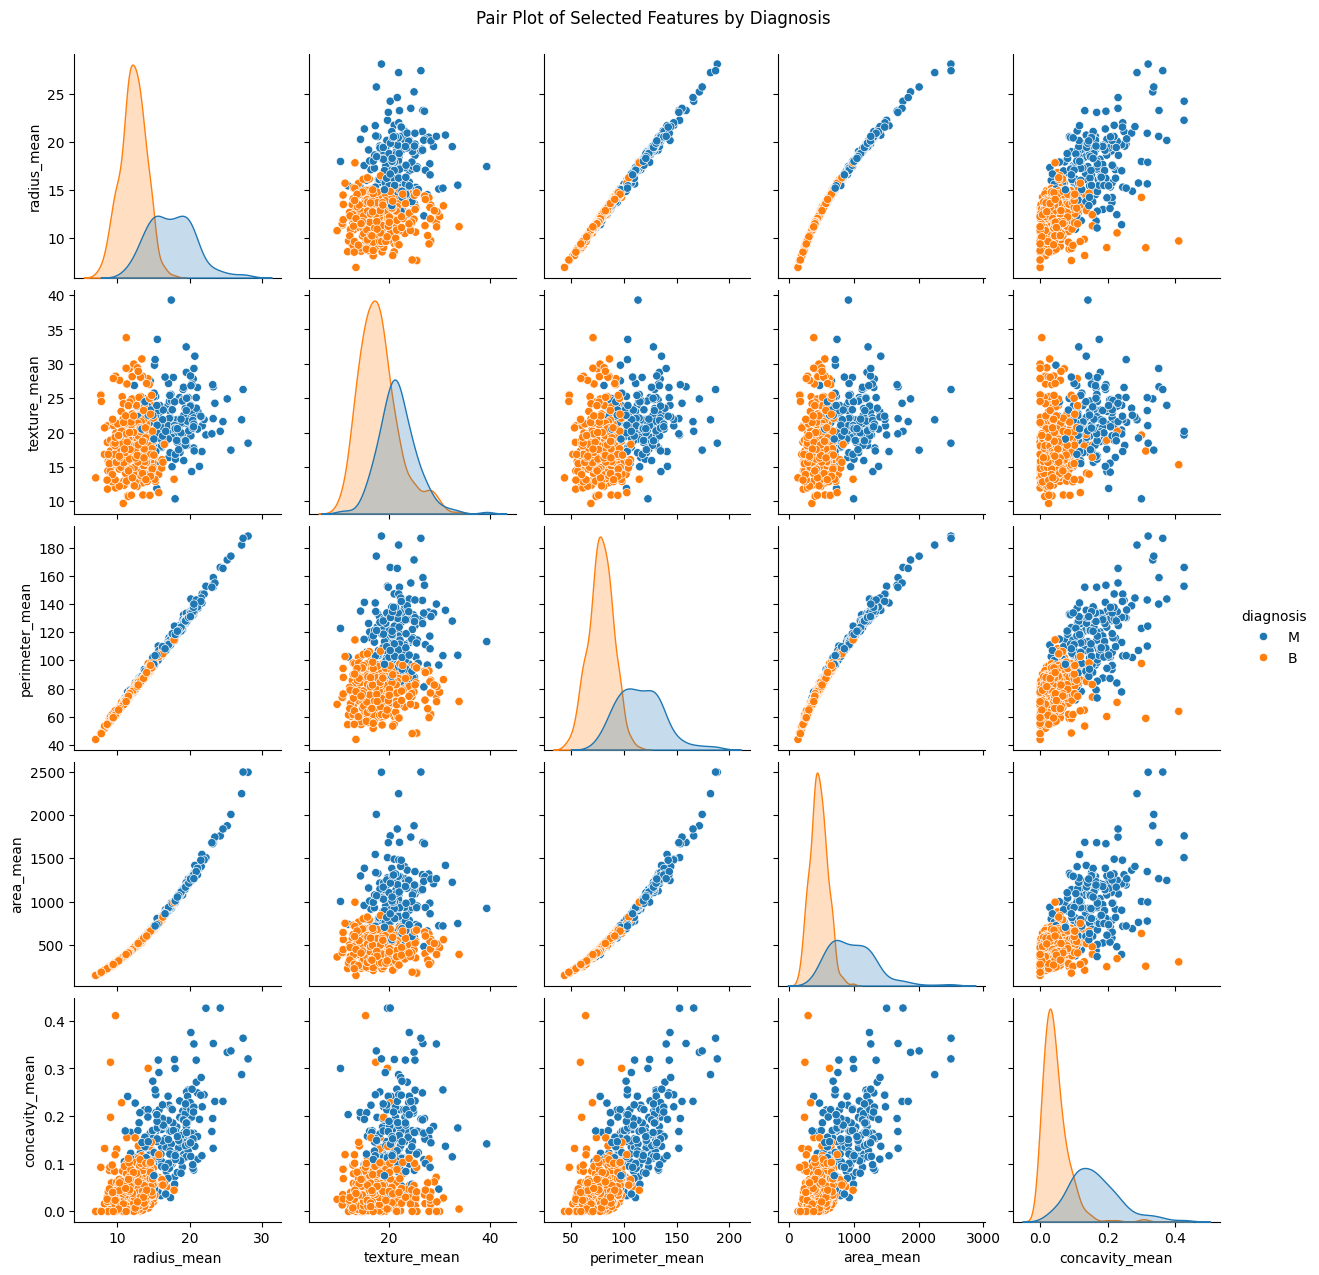

In [43]:
#6 Pair Plot
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'diagnosis']], hue='diagnosis')
plt.suptitle('Pair Plot of Selected Features by Diagnosis', y=1.02)
plt.show()

# Secara umum, variabel Radius Mean dan Perimeter Mean menunjukkan korelasi yang sangat kuat. Ketika radius sel meningkat, perimeter (keliling) juga meningkat. Ini logis, karena perimeter bertambah seiring dengan bertambahnya ukuran radius. Perimeter dan radius yang besar menjadi indikator potensial adanya sel ganas.
# Secara visual, ada kecenderungan bahwa ketika nilai Area Mean meningkat, nilai Radius Mean juga ikut meningkat, khususnya pada Malignant. Hal ini menunjukkan adanya korelasi positif antara kedua variabel tersebut, yang berarti bahwa tumor yang lebih besar dalam area cenderung memiliki ukuran radius yang lebih besar.
# Ada kecenderungan bahwa concavity_mean (tingkat kedalaman cekungan sel) meningkat ketika radius_mean (ukuran radius) juga meningkat, khususnya pada Malignant. Malignant cenderung memiliki cekungan yang lebih dalam dan radius yang lebih besar, menandakan adanya hubungan antara ukuran sel dan bentuk yang lebih tidak teratur.
# Variabel Texture Mean menunjukkan pola yang menarik, di mana ada perbedaan distribusi yang jelas antara kedua kelompok. Malignant memiliki nilai texture mean yang lebih tinggi, yang dapat mengindikasikan bahwa tekstur tumor yang lebih kasar mungkin terkait dengan sifat ganas dari tumor tersebut.
# Korelasi antara beberapa variabel seperti Perimeter Mean dan Area Mean juga terlihat cukup kuat, menunjukkan bahwa tumor yang lebih besar cenderung memiliki perimeter yang lebih besar. Ini dapat membantu dalam penilaian awal terhadap ukuran dan potensi keparahan tumor berdasarkan karakteristik fisiknya.
# Tidak semua variabel menunjukkan hubungan yang kuat. Misalnya, variabel Smoothness Mean tidak menunjukkan hubungan yang jelas dengan variabel lain, baik pada Benign maupun Malignant. Ini menunjukkan bahwa smoothness mungkin tidak sekuat radius atau area dalam membantu membedakan antara tumor jinak dan ganas.

7. Encode categorical column (diagnosis) and display the results

In [44]:
#7
diagnosis_mapping = {'B': 0, 'M': 1}
df['diagnosis'] = df['diagnosis'].map(diagnosis_mapping)
df.head()

# Mengubah nilai categorical pada kolom diagnosis menjadi numeric (B menjadi 0 dan M menjadi 1), kemudian menampilkan 5 baris data pertama.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


8. Create a heatmap to see the correlation

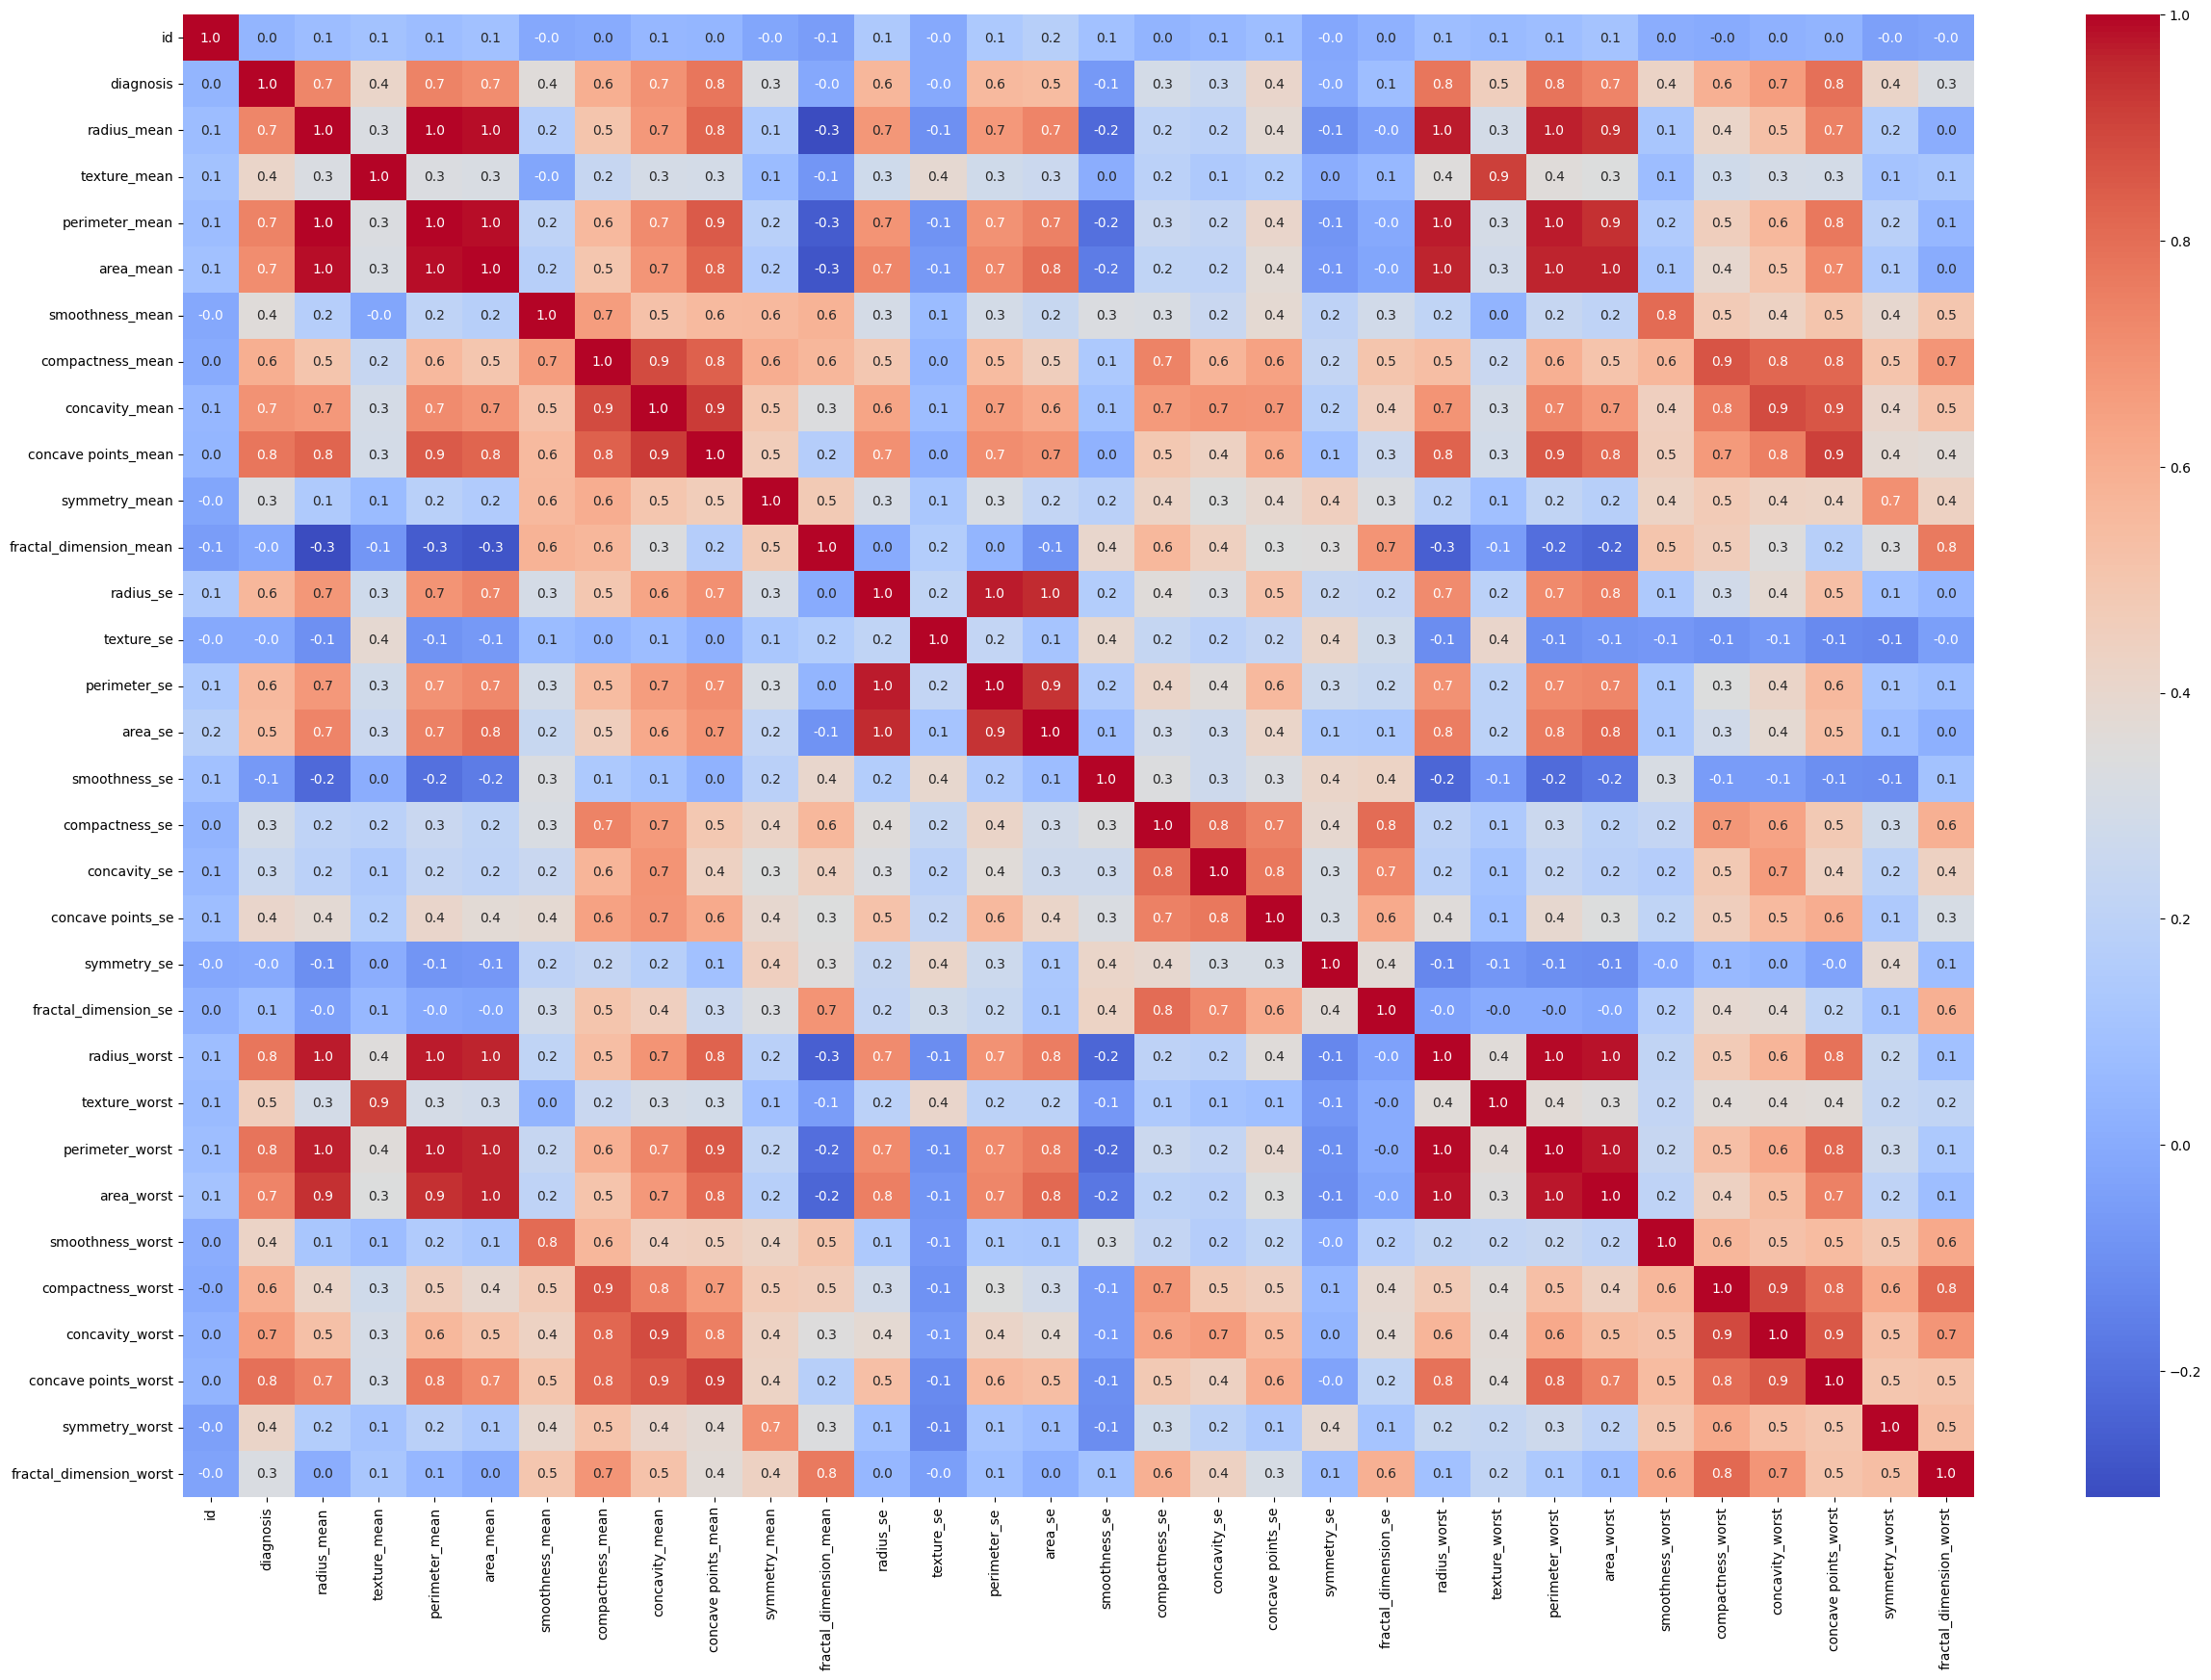

In [45]:
#8
correlation_matrix = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.show()

# Warna biru pada heatmap menandakan korelasi negatif. Jika satu variabel meningkat, variabel lainnya cenderung menurun.
# Warna merah menandakan korelasi positif. Jika satu variabel meningkat, variabel lainnya juga cenderung meningkat.
# Warna abu-abu atau warna-warna di antara biru dan merah menunjukkan korelasi yang lebih lemah atau hampir tidak ada korelasi yang signifikan.
# Dari heatmap ini, dapat disimpulkan:
# - Radius Mean dan Perimeter Mean (0.99): Korelasi positif yang sangat kuat. Ini berarti ketika radius sel meningkat, perimeter juga cenderung meningkat secara proporsional. Radius dan perimeter yang besar bersama-sama menunjukkan ukuran keseluruhan sel yang lebih besar, yang bisa menjadi indikator adanya kanker ganas.
# - Area Mean dan Radius Mean (0.98): Korelasi positif yang sangat kuat. Artinya, semakin besar radius, semakin besar pula area sel. Ukuran area yang besar, yang berhubungan langsung dengan radius, sangat terkait dengan diagnosis ganas.
# - Concavity Mean dan Radius Mean (0.82): Korelasi positif yang cukup kuat, yang berarti semakin besar radius, semakin dalam cekungan pada sel. Radius yang besar dan cekungan yang dalam pada sel dapat menjadi indikator kuat keganasan, mengingat bahwa sel kanker sering kali menunjukkan bentuk yang lebih tidak teratur.
# Selain itu, dari heatmap ini juga dapat terlihat korelasi yang kuat antara variabel diagnosis dengan beberapa variabel lain, seperti concave points_mean, concavity_mean, area_mean, dan radius_mean.

## Machine Learning

1. Splitting X and y

In [46]:
#1
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Seluruh variabel kecuali diagnosis menjadi variabel independen (fitur yang akan digunakan untuk memprediksi) dan disimpan dalam X
# y menyimpan variabel diagnosis sebagai target variabel dependen yang ingin diprediksi

In [47]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membagi data menjadi train data (75%) dan test data (25%) dengan random state 42

In [48]:
#3
X_train.shape, X_test.shape

# Menampilkan dimensi dari X_train dan X_test

((426, 31), (143, 31))

## Desicion Tree


---

a. Defining the model using criterion Entropy <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>

In [49]:
#a
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
clf_entropy.fit(X_train, y_train) # Fungsi ini melatih model decision tree menggunakan data X_train sebagai fitur dan y_train sebagai target. Model akan belajar dari data tersebut untuk memprediksi kelas yang tepat berdasarkan fitur yang diberikan.

# criterion='entropy': Parameter ini menentukan kriteria pemisahan yang akan digunakan untuk membangun decision tree. Dengan menggunakan entropy, algoritma ini akan menghitung entropi untuk memilih fitur terbaik yang dapat memisahkan kelas target dalam data. Ini adalah salah satu cara untuk mengukur "ketidakpastian" atau "ketidakpastian informasi" dari data.
# random_state=42: Parameter ini digunakan untuk memastikan bahwa hasil pemodelan dapat dihasilkan kembali di lain waktu dengan konsisten.
# max_depth=4: Parameter ini membatasi kedalaman maksimum decision tree hingga 4. Hal ini mencegah model dari overfitting dengan meminimalkan kompleksitasnya.

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [50]:
#b
y_pred_entropy = clf_entropy.predict(X_test)

# Variabel y_pred_entropy menyimpan hasil prediksi yang dihasilkan oleh model. Hasil ini akan berupa array atau daftar yang berisi kelas-kelas yang diprediksi untuk setiap baris dalam X_test, yang kemudian dapat digunakan untuk evaluasi model, seperti menghitung akurasi, presisi, dan metrik lainnya untuk menilai kinerja model.

In [51]:
#c
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy:", accuracy_entropy)

# Variabel accuracy_entropy akan berisi nilai akurasi dari model klasifikasi, yang dapat berkisar antara 0 hingga 1 (atau 0% hingga 100% jika dinyatakan dalam persentase). Nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam memprediksi label dengan benar, dan ini memberikan informasi penting tentang seberapa baik model tersebut bekerja dalam klasifikasi data pengujian.
# Nilai akurasi 0.958041958041958 (atau sekitar 95.8%) menunjukkan bahwa model yang menggunakan criterion entropy berhasil memprediksi sekitar 95.8% dari seluruh sampel di data pengujian dengan benar.

Model accuracy score with criterion entropy: 0.958041958041958


In [52]:
#d
# Menghitung dan mencetak score dari training set
train_score = clf_entropy.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Menghitung dan mencetak score dari test set
test_score = clf_entropy.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

# Model memiliki akurasi 99.3% pada train data dan 95.8% pada test data. Perbedaan yang tipis antara skor training dan test ini menunjukkan bahwa kemungkinan besar model tidak mengalami overfitting.

Training set score: 0.9930
Test set score: 0.9580


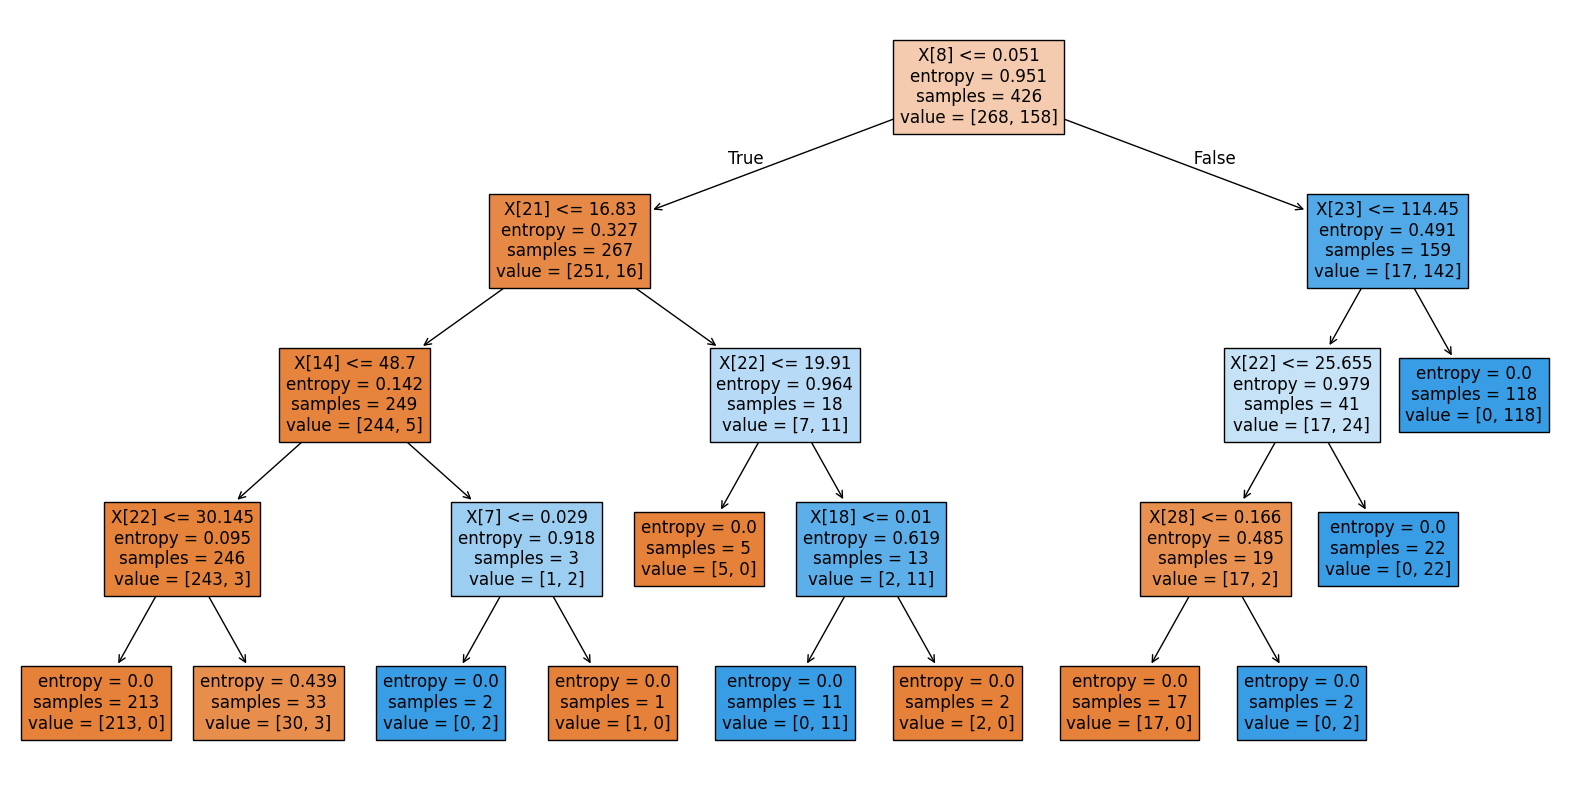

In [53]:
#e
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_entropy, filled=True, feature_names=[f"X[{i}]" for i in range(X.shape[1])])
plt.show()

# Decision tree digunakan untuk mengklasifikasikan dataset menjadi kelas Malignant (M) dan Benign (B).
# Setiap node menunjukkan fitur yang digunakan untuk membagi data pada titik tertentu, seperti X[8] (concavity_mean), X[21] (fractal_dimension_se), atau X[23] (texture_worst).
# Entropy menunjukkan ketidakpastian dalam node tersebut. Semakin rendah nilai entropy, semakin baik pembagian datanya.
# Pada setiap node, data dibagi berdasarkan kondisi tertentu dari fitur yang diukur. Contohnya, X[8] <= 0.051 pada node pertama adalah kondisi pembagian pertama.
# Node daun di akhir cabang menunjukkan hasil klasifikasi akhir berdasarkan nilai sampel di sana. Sebagai contoh, cabang yang memiliki entropy = 0.0 berarti semua data pada node tersebut berada dalam satu kelas.

In [54]:
#f
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix Entropy")
print(cm_entropy)

# Code ini membuat dan mencetak confusion matrix untuk mengevaluasi performa model klasifikasi pada data pengujian. Confusion matrix adalah tabel yang menunjukkan jumlah prediksi benar dan salah yang dibuat oleh model untuk setiap kelas.
# 87: Model memprediksi negatif dengan benar (True Negative).
# 2: Model salah memprediksi sebagai positif ketika sebenarnya negatif (False Positive).
# 4: Model salah memprediksi sebagai negatif ketika sebenarnya positif (False Negative).
# 50: Model memprediksi positif dengan benar (True Positive).

# Kesimpulan:
# Model menunjukkan performa baik dalam mengidentifikasi kelas negatif dengan 87 True Negatives dan juga menunjukkan kinerja yang kuat pada kelas positif dengan 50 True Positives. Namun, ada 4 False Negatives yang menunjukkan tantangan dalam mengidentifikasi semua contoh positif, yang menunjukkan perlunya perbaikan untuk meningkatkan akurasi prediksi pada kelas positif. Secara keseluruhan, model ini memiliki kinerja yang baik, tetapi dapat ditingkatkan lebih lanjut untuk meminimalkan kesalahan pada kelas positif.

Confusion Matrix Entropy
[[87  2]
 [ 4 50]]


In [55]:
#g
cr_entropy = classification_report(y_test, y_pred_entropy)
print("Classification Report Entropy")
print(cr_entropy)

# Kelas 0 (89 sampel):
# Precision: 0.96 berarti 96% dari prediksi untuk kelas 0 benar (sisanya adalah prediksi salah).
# Recall: 0.98 menunjukkan bahwa model berhasil mengidentifikasi 98% dari semua sampel kelas 0 yang sebenarnya.
# F1-score: 0.97 adalah rata-rata harmonis dari precision dan recall, menunjukkan performa yang sangat baik dalam memprediksi kelas 0.

# Kelas 1 (54 sampel):
# Precision: 0.96 berarti 96% dari prediksi untuk kelas 1 benar.
# Recall: 0.93 menunjukkan bahwa model berhasil mengidentifikasi 93% dari semua sampel aktual di kelas 1.
# F1-score: 0.94 menunjukkan keseimbangan antara precision dan recall di kelas ini, yang juga menunjukkan performa yang sangat baik.

# Kesimpulan:
# Model Entropy menunjukkan kinerja yang sangat baik pada kedua kelas, dengan akurasi keseluruhan sebesar 96%. Precision, recall, dan f1-score yang tinggi untuk kedua kelas menunjukkan bahwa model ini mampu memprediksi kedua kelas dengan tingkat kesalahan yang rendah. Kinerja yang hampir seimbang antara kedua kelas menunjukkan bahwa model ini cukup akurat dan andal dalam memprediksi sampel dari kedua kelas.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



## Logistic Regression


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>

In [56]:
#a
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train) # Fungsi ini melatih model decision tree menggunakan data X_train sebagai fitur dan y_train sebagai target. Model akan belajar dari data tersebut untuk memprediksi kelas yang tepat berdasarkan fitur yang diberikan.

# max_iter=200: Parameter ini menetapkan batas maksimum iterasi pelatihan menjadi 200. Jika model membutuhkan lebih banyak iterasi untuk konvergen (mencapai solusi optimal), maka ia bisa melakukannya hingga 200 iterasi.

LogisticRegression(max_iter=200)

In [57]:
#b
y_pred_logreg = logreg.predict(X_test)

# Variabel y_pred_logreg menyimpan hasil prediksi yang dihasilkan oleh model. Hasil ini akan berupa array atau daftar yang berisi kelas-kelas yang diprediksi untuk setiap baris dalam X_test, yang kemudian dapat digunakan untuk evaluasi model, seperti menghitung akurasi, presisi, dan metrik lainnya untuk menilai kinerja model.

In [58]:
#c
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("Model accuracy score with Logistic Regression:" , accuracy_logreg)

# Variabel accuracy_logreg akan berisi nilai akurasi dari model klasifikasi, yang dapat berkisar antara 0 hingga 1 (atau 0% hingga 100% jika dinyatakan dalam persentase). Nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam memprediksi label dengan benar, dan ini memberikan informasi penting tentang seberapa baik model tersebut bekerja dalam klasifikasi data pengujian.
# Nilai akurasi 0.956140350877193 (atau sekitar 95.6%) menunjukkan bahwa model Logistic Regression berhasil memprediksi sekitar 95.6% dari sampel data pengujian dengan benar.

Model accuracy score with Logistic Regression: 0.951048951048951


In [59]:
#d
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Confusion Matrix Logistic Regression")
print(conf_matrix_logreg)

# Code ini membuat dan mencetak confusion matrix untuk mengevaluasi performa model klasifikasi pada data pengujian. Confusion matrix adalah tabel yang menunjukkan jumlah prediksi benar dan salah yang dibuat oleh model untuk setiap kelas.
# 84: Model memprediksi negatif dengan benar (True Negative).
# 5: Model salah memprediksi sebagai positif ketika sebenarnya negatif (False Positive).
# 5: Model salah memprediksi sebagai negatif ketika sebenarnya positif (False Negative).
# 49: Model memprediksi positif dengan benar (True Positive).

# Kesimpulan:
# Model Logistic Regression menunjukkan performa yang baik dalam mengidentifikasi kelas negatif dengan 84 True Negatives dan juga mampu mengidentifikasi sejumlah positif dengan 49 True Positives. Namun, terdapat 5 False Negatives, yang menunjukkan bahwa model tidak selalu mengenali setiap contoh positif, walaupun jumlahnya kecil. Selain itu, 5 False Positives menunjukkan bahwa beberapa sampel negatif salah diprediksi sebagai positif. Secara keseluruhan, model memiliki performa yang baik dalam memprediksi kedua kelas dan hanya sedikit kesalahan.

Confusion Matrix Logistic Regression
[[87  2]
 [ 5 49]]


In [60]:
#e
class_report_logreg = classification_report(y_test, y_pred_logreg)
print("Classification Report Logistic Regression")
print(class_report_logreg)

# Kelas 0 (89 sampel):
# Precision: 0.94 berarti 94% dari prediksi untuk kelas 0 benar (sisanya adalah prediksi salah).
# Recall: 0.94 menunjukkan bahwa model berhasil mengidentifikasi 94% dari semua sampel aktual di kelas 0.
# F1-score: 0.94 adalah rata-rata harmonis dari precision dan recall, menunjukkan performa yang sangat baik di kelas ini.

# Kelas 1 (54 sampel):
# Precision: 0.91 menunjukkan bahwa 91% dari prediksi untuk kelas 1 benar.
# Recall: 0.91 berarti model berhasil mengidentifikasi 91% dari semua sampel aktual di kelas 1.
# F1-score: 0.91 mengindikasikan keseimbangan antara precision dan recall di kelas ini, meskipun performanya sedikit lebih rendah dibandingkan kelas 0.

# Kesimpulan:
# Model Logistic Regression menunjukkan kinerja yang baik pada kedua kelas, terutama pada kelas 0 yang memiliki precision dan recall lebih tinggi. Akurasi keseluruhan sebesar 93% menunjukkan performa model yang kuat, meskipun ada sedikit perbedaan dalam performa antara kelas 0 dan kelas 1. Namun, precision dan recall untuk kedua kelas sudah cukup tinggi dan seimbang, yang menunjukkan bahwa model ini memiliki performa yang baik dalam mengklasifikasikan sampel di kedua kelas.

Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        89
           1       0.96      0.91      0.93        54

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



## K-NN


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>

In [61]:
# a
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train, y_train)

# Fungsi ini melatih model K-NN menggunakan data X_train sebagai fitur dan y_train sebagai target. Model akan belajar dari data tersebut untuk memprediksi kelas yang tepat berdasarkan fitur yang diberikan.
# n_neighbors=5: Parameter ini menentukan jumlah tetangga terdekat yang akan dipertimbangkan saat membuat prediksi. Dalam hal ini, model akan melihat 5 tetangga terdekat dari data yang ingin diprediksi.
# metric='euclidean': Ini adalah jenis metrik yang digunakan untuk menghitung jarak antara titik data. Dalam kasus ini, jarak Euclidean akan digunakan, yang mengukur jarak "lurus" antara dua titik dalam ruang multidimensi.

KNeighborsClassifier(metric='euclidean')

In [62]:
# b
y_pred_knn = classifier.predict(X_test)

# Variabel y_pred_knn menyimpan hasil prediksi yang dihasilkan oleh model. Hasil ini akan berupa array atau daftar yang berisi kelas-kelas yang diprediksi untuk setiap baris dalam X_test, yang kemudian dapat digunakan untuk evaluasi model, seperti menghitung akurasi, presisi, dan metrik lainnya untuk menilai kinerja model.

In [63]:
# c
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Model accuracy score with K-NN: " , accuracy_knn)

# Variabel accuracy_knn akan berisi nilai akurasi dari model klasifikasi, yang dapat berkisar antara 0 hingga 1 (atau 0% hingga 100% jika dinyatakan dalam persentase). Nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam memprediksi label dengan benar, dan ini memberikan informasi penting tentang seberapa baik model tersebut bekerja dalam klasifikasi data pengujian.
# Nilai akurasi 0.7342657342657343 (atau sekitar 73.4%) menunjukkan bahwa model K-NN berhasil memprediksi sekitar 73.4% dari sampel data pengujian dengan benar.

Model accuracy score with K-NN:  0.7342657342657343


In [64]:
#d
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix K-NN")
print(conf_matrix_knn)

# 79: Model memprediksi negatif dengan benar (True Negative).
# 10: Model salah memprediksi sebagai positif ketika sebenarnya negatif (False Positive).
# 28: Model salah memprediksi sebagai negatif ketika sebenarnya positif (False Negative).
# 26: Model memprediksi positif dengan benar (True Positive).

# Kesimpulan:
# Model menunjukkan performa yang baik dalam mengidentifikasi kelas negatif dengan 79 True Negatives. Namun, ada tantangan dalam mengidentifikasi kelas positif, di mana model membuat 28 False Negatives dan hanya 26 True Positives.
# Meskipun model memiliki sejumlah kesalahan dalam mengidentifikasi kelas positif, hasil ini menunjukkan bahwa model K-NN dapat memprediksi kelas negatif dengan baik. Upaya lebih lanjut diperlukan untuk meningkatkan akurasi prediksi pada kelas positif, terutama dalam mengurangi jumlah kesalahan klasifikasi.

Confusion Matrix K-NN
[[79 10]
 [28 26]]


In [65]:
#e
class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report K-NN")
print(class_report_knn)

# Kelas 0 (89 sample):
# Precision: 0.74, artinya dari semua prediksi yang diklasifikasikan sebagai kelas 0, 74% benar-benar merupakan kelas 0.
# Recall: 0.89, artinya dari semua contoh yang sebenarnya kelas 0, 89% berhasil diprediksi dengan benar sebagai kelas 0.
# F1-Score: 0.81, menunjukkan rata-rata harmonis antara precision dan recall, yang menunjukkan keseimbangan yang baik antara keduanya.

# Kelas 1 (54 sample):
# Precision: 0.72, artinya dari semua prediksi yang diklasifikasikan sebagai kelas 1, 72% benar-benar merupakan kelas 1.
# Recall: 0.48, artinya dari semua contoh yang sebenarnya kelas 1, hanya 48% berhasil diprediksi dengan benar sebagai kelas 1.
# F1-Score: 0.58, menunjukkan keseimbangan yang lebih rendah antara precision dan recall untuk kelas 1, mencerminkan tantangan dalam mengidentifikasi kelas positif.

# Kesimpulan:
# Classification report menunjukkan bahwa model K-NN memiliki performa yang cukup baik untuk kelas 0, dengan akurasi dan nilai yang layak diukur melalui precision, recall, dan f1-score. Namun, untuk kelas 1, model menunjukkan kinerja yang lebih rendah, terutama pada recall yang hanya mencapai 48%, yang menunjukkan bahwa banyak contoh kelas positif tidak berhasil teridentifikasi.
# Dengan akurasi keseluruhan 73%, model ini menunjukkan bahwa meskipun dapat mengklasifikasikan kelas negatif dengan baik, ada kebutuhan untuk perbaikan dalam mengidentifikasi kelas positif. Upaya lebih lanjut diperlukan untuk meningkatkan performa pada kelas 1, agar model lebih efektif dalam pengklasifikasian data.

Classification Report K-NN
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        89
           1       0.72      0.48      0.58        54

    accuracy                           0.73       143
   macro avg       0.73      0.68      0.69       143
weighted avg       0.73      0.73      0.72       143

